In [ ]:
%matplotlib inline


# Recognizing hand-written digits

This example shows how scikit-learn can be used to recognize images of
hand-written digits, from 0-9.


In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Automatically created module for IPython interactive environment


## Digits dataset

The digits dataset consists of 8x8
pixel images of digits. The ``images`` attribute of the dataset stores
8x8 arrays of grayscale values for each image. We will use these arrays to
visualize the first 4 images. The ``target`` attribute of the dataset stores
the digit each image represents and this is included in the title of the 4
plots below.

Note: if we were working from image files (e.g., 'png' files), we would load
them using :func:`matplotlib.pyplot.imread`.



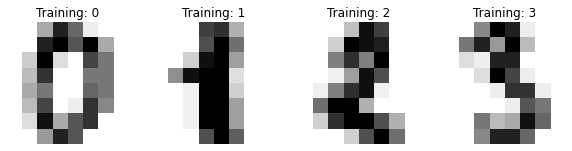

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

## Classification

To apply a classifier on this data, we need to flatten the images, turning
each 2-D array of grayscale values from shape ``(8, 8)`` into shape
``(64,)``. Subsequently, the entire dataset will be of shape
``(n_samples, n_features)``, where ``n_samples`` is the number of images and
``n_features`` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support
vector classifier on the train samples. The fitted classifier can
subsequently be used to predict the value of the digit for the samples
in the test subset.



In [ ]:
# flatten the images
n_samples = len(digits.images)
print(n_samples)
data = digits.images.reshape((n_samples, -1))
print(data)
print(type(digits.images))
# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

1797
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
<class 'numpy.ndarray'>


In [ ]:
cv2_imshow(X_test)

# Mục mới

Below we visualize the first 4 test samples and show their predicted
digit value in the title.



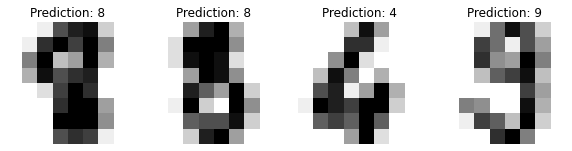

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

:func:`~sklearn.metrics.classification_report` builds a text report showing
the main classification metrics.



In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

We can also plot a `confusion matrix <confusion_matrix>` of the
true digit values and the predicted digit values.



Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


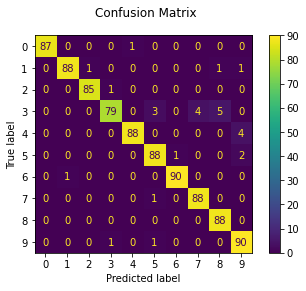

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# **Chụp từ smartphone**


Vì camera Laptop em bị hư nên em chụp hình bằng điện thoại

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Các thư viện xử lý ảnh
from IPython.display import Image
from google.colab.patches import cv2_imshow
import os
import numpy as np

**Hàm load ảnh lên từ drive**


In [ ]:
#https://www.codegrepper.com/code-examples/python/how+to+load+images+from+folder+in+python
import cv2
import os

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images

In [ ]:
from PIL import Image
folder="/content/drive/MyDrive/Classroom/CS114.ML - MACHINE LEARNING CS114.L2x.ALL - HK2 (2020-2021)/Data/picture"
image_data=load_images_from_folder(folder)
image_PIL=[]
for i in image_data:
  image_PIL.append(Image.fromarray(i))

# **Bộ ảnh test**

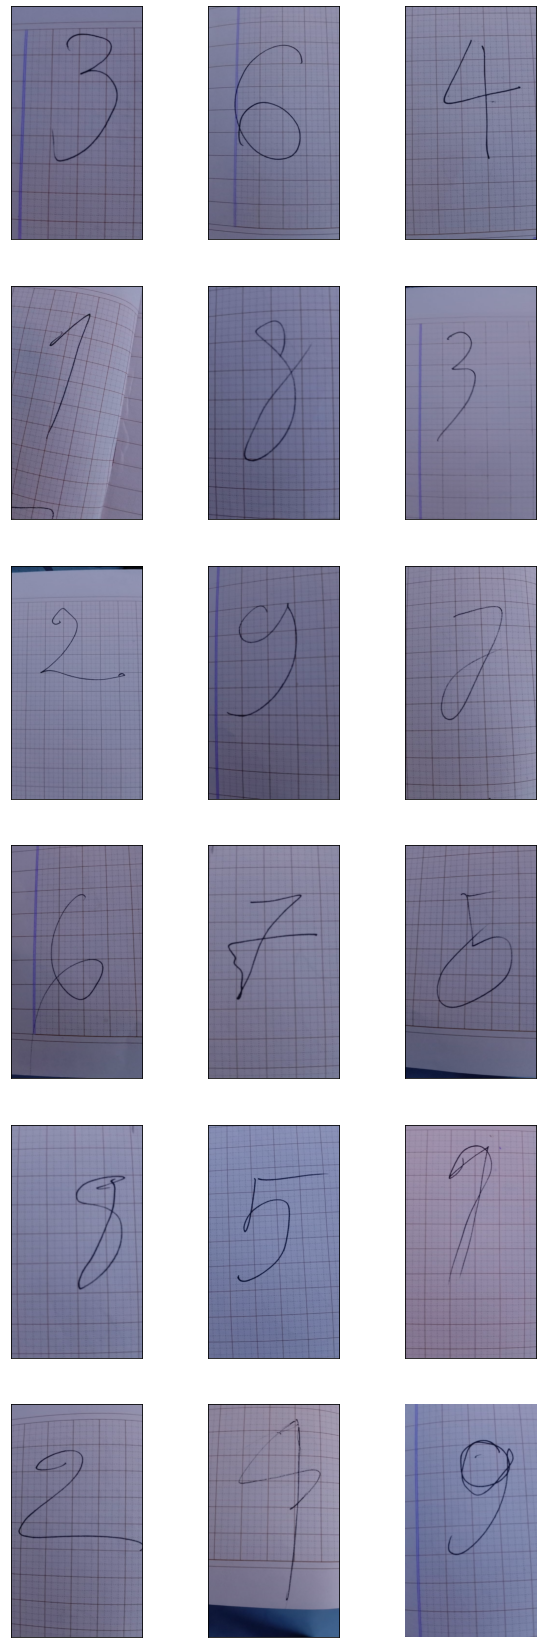

In [ ]:
fig, axs = plt.subplots(6, 3,figsize=(10,30))
plt.axis('off')
for i in range(6):
  for j in range(3):
    axs[i][j].imshow(image_PIL[i*3+j])
    axs[i][j].axes.get_xaxis().set_visible(False)
    axs[i][j].axes.get_yaxis().set_visible(False)


# **Gán Label vào bộ ảnh test**

In [ ]:
label = [3,6,4,1,8,3,2,9,7,6,7,5,8,5,1,2,4,9]

**Hàm để Resize ảnh khi ảnh quá nhỏ hay quá to để Display**

In [ ]:
#https://stackoverflow.com/questions/35180764/opencv-python-image-too-big-to-display
def show_image(image_arr,scale_percent):
  width = int(image_arr.shape[1] * scale_percent / 100)
  height = int(image_arr.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(image_arr, dim, interpolation = cv2.INTER_AREA)
  cv2_imshow(resized)

**Xử lý ảnh/dữ liệu**


In [ ]:
#Xử lý data
def data_processing(img):
  image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  ret, thresh_binary = cv2.threshold(image, 120, 255, cv2.THRESH_BINARY)
  ret, thresh_binary2 = cv2.threshold(thresh_binary, 170, 255, cv2.THRESH_BINARY_INV)
  resize1 = cv2.resize(thresh_binary2, (8, 8), interpolation = cv2.INTER_AREA)
  display_3_status(image,thresh_binary,thresh_binary2,resize1)
  #display_3_status(image,thresh_binary,thresh_binary,resize1)
  norm_image = cv2.normalize(resize1, None, alpha = 0, beta = 15, norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_32F)
  reshape = norm_image.reshape(-1, 64)
  return reshape

In [ ]:
import numpy as np
def display_3_status(im1,im2,im3,im4):
  x=np.concatenate((im1,im2,im3),axis=1)
  show_image(x,15)
  show_image(im4,2580)
  return 0

In [ ]:
label = [3,6,4,1,8,3,2,9,7,6,7,5,8,5,1,2,4,9]
def result_predicted(img,i):
  reshape=data_processing(img)
  predicted=clf.predict(reshape)
  x=predicted
  print("Result predicted:",predicted)
  print("Real label:",label[i])
  return x

In [ ]:
#Lưu lại kết quả predict
pre=[]

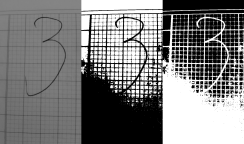

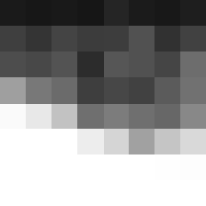

Result predicted: [1]
Real label: 3


In [ ]:
pre.append(result_predicted(image_data[0],0))

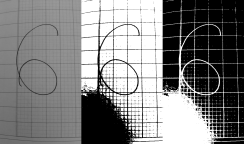

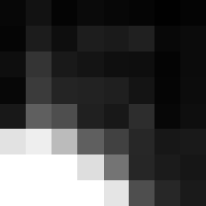

Result predicted: [2]
Real label: 6


In [ ]:
pre.append(result_predicted(image_data[1],1))

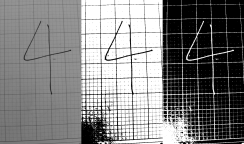

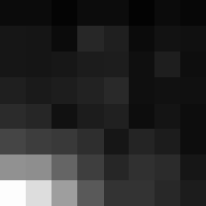

Result predicted: [2]
Real label: 4


In [ ]:
pre.append(result_predicted(image_data[2],2))

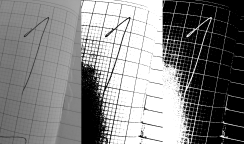

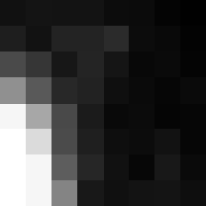

Result predicted: [5]
Real label: 1


In [ ]:
pre.append(result_predicted(image_data[3],3))

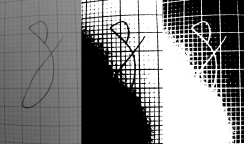

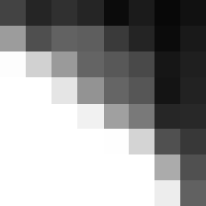

Result predicted: [1]
Real label: 8


In [ ]:
pre.append(result_predicted(image_data[4],4))

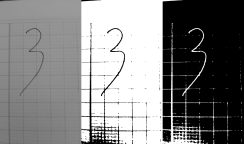

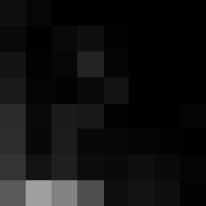

Result predicted: [2]
Real label: 3


In [ ]:
pre.append(result_predicted(image_data[5],5))

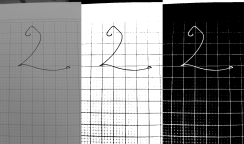

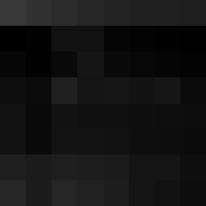

Result predicted: [5]
Real label: 2


In [ ]:
pre.append(result_predicted(image_data[6],6))

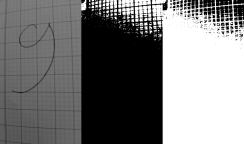

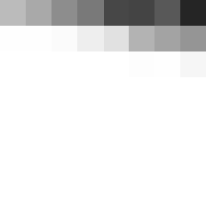

Result predicted: [1]
Real label: 9


In [ ]:
pre.append(result_predicted(image_data[7],7))

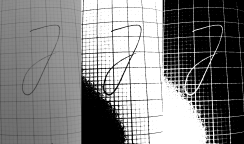

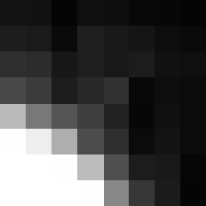

Result predicted: [2]
Real label: 7


In [ ]:
pre.append(result_predicted(image_data[8],8))

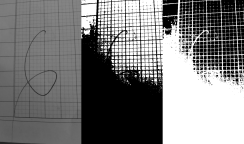

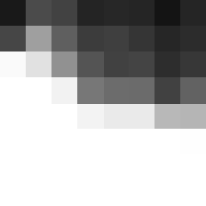

Result predicted: [1]
Real label: 6


In [ ]:
pre.append(result_predicted(image_data[9],9))

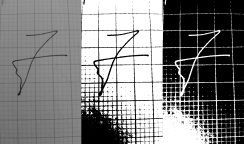

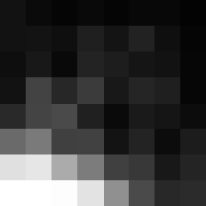

Result predicted: [2]
Real label: 7


In [ ]:
pre.append(result_predicted(image_data[10],10))

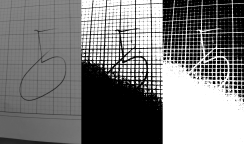

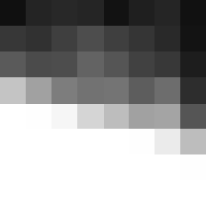

Result predicted: [1]
Real label: 5


In [ ]:
pre.append(result_predicted(image_data[11],11))

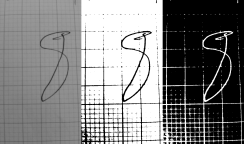

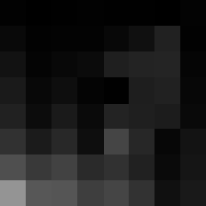

Result predicted: [2]
Real label: 8


In [ ]:
pre.append(result_predicted(image_data[12],12))

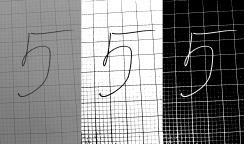

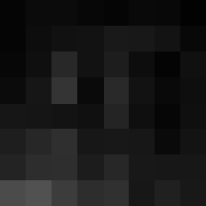

Result predicted: [2]
Real label: 5


In [ ]:
pre.append(result_predicted(image_data[13],13))

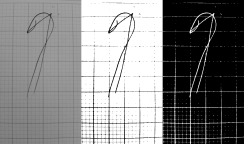

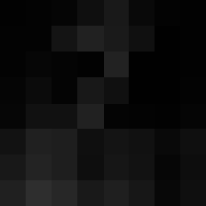

Result predicted: [2]
Real label: 1


In [ ]:
pre.append(result_predicted(image_data[14],14))

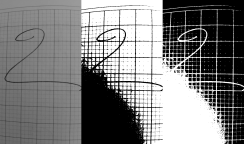

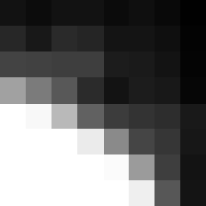

Result predicted: [2]
Real label: 2


In [ ]:
pre.append(result_predicted(image_data[15],15))

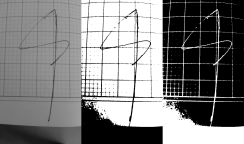

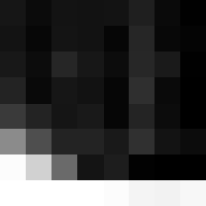

Result predicted: [2]
Real label: 4


In [ ]:
pre.append(result_predicted(image_data[16],16))

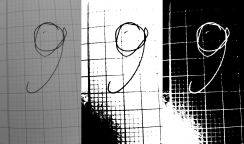

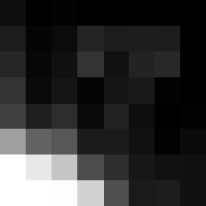

Result predicted: [2]
Real label: 9


In [ ]:
pre.append(result_predicted(image_data[17],17))

# **Đánh giá độ chính xác**

Đếm số lượng dự đoán khớp với label và đưa ra xác suất chính ra của model

In [ ]:
for i in range(len(pre)):
  pre[i]=pre[i][0]

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of new test set: {}".format(accuracy_score(label,pre)))

Accuracy of new test set: 0.05555555555555555


In [ ]:
sl_true=0
for i in range(len(label)):
  if(label[i]==pre[i]):
    sl_true+=1
print("So luong predict khop voi real label:",sl_true)

So luong predict khop voi real label: 1


## **Kết luận**


*   Kết quả chạy thực tế với webcam của laptop và giấy viết tay của các bạn có tốt không?
>Kết quả dự đoán là cực kỳ tệ
*   Ủa mà nhìn vào đâu để kết luận là tốt hay không?
>Ta nhìn vào số lượng predict khớp với label ta có thể nói là model dự đoán này là không tốt
*   Nếu không tốt thì lý do tại sao?
>có nhiều lý do nhưng theo em dự đoán là:

>>>1.   Ảnh chụp không được đẹp, không cân đối về độ sáng tối và số được viết tập 4 ô
>>>2.   Ảnh được train trong trong ví dụ là trong một môi trường có kiểm soát, ảnh rất mượt, chữ số trên nền giấy trắng và độ cân bằng sáng tối của ảnh là tốt
>>>3.   Độ phân giải của ảnh em chụp thấp với 543x960 khiến khi resize lại ảnh làm mất nhiều data


*   Nếu tốt thì tiếp theo có thể dùng model digits recognition này vào các bài toán phức tạp hơn như nhận dạng biển số nhà không?
>Hiện tại sau thực nghiệm của em thì em khẳng định là model này không thể thực hiện các bài toán phức tạp hơn



